# Time series values for Vatnsendi pumpstation

In [420]:
import matplotlib.pyplot as plt
import pandas as pd

In [421]:
df_pressure_1 = pd.read_excel("data/H-KOP-VE-ÞS212.xlsx")
df_pressure_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure_2 = pd.read_excel("data/H-KOP-VE-ÞS213.xlsx")
df_pressure_2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

In [422]:
df_pressure_1.head()

,start_time,value
0,2022-03-14 23:00:00,9.0
1,2022-03-13 16:00:00,9.0
2,2022-03-08 02:00:00,9.0
3,2022-03-08 03:00:00,9.0
4,2022-03-13 18:00:00,9.0


In [423]:
df_pressure_2.head()

,start_time,value
0,2022-03-14 23:00:00,5.60
1,2022-03-13 16:00:00,5.55
2,2022-03-08 02:00:00,5.56
3,2022-03-08 03:00:00,5.56
4,2022-03-13 18:00:00,5.63


In [424]:
# Convert 'start_time' to datetime format
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-09"
# specific_day = "2024-08-08"

df_specific_day = df_pressure_1[df_pressure_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-09 01:00:00,9.00,0.999807
2024-11-09 02:00:00,9.00,0.999807
2024-11-09 03:00:00,9.00,0.999807
2024-11-09 04:00:00,9.01,1.000918
2024-11-09 05:00:00,9.01,1.000918
2024-11-09 06:00:00,9.01,1.000918
2024-11-09 07:00:00,9.01,1.000918
2024-11-09 08:00:00,9.00,0.999807
2024-11-09 09:00:00,9.00,0.999807


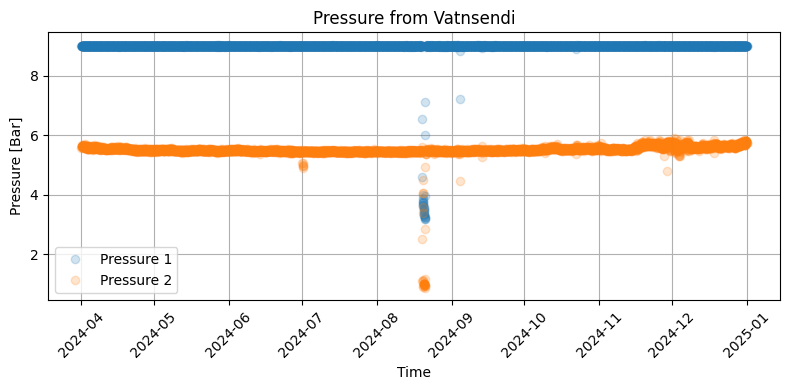

In [425]:
# Convert 'start_time' to datetime format for both DataFrames
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')
df_pressure_2['start_time'] = pd.to_datetime(df_pressure_2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_pressure_1[(df_pressure_1['start_time'].dt.year == 2024) & (df_pressure_1['start_time'].dt.month > 3)]
df_filtered_2 = df_pressure_2[(df_pressure_2['start_time'].dt.year == 2024) & (df_pressure_2['start_time'].dt.month > 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_pressure_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 1')  # Alpha controls opacity

# Plot pressure_2 from df_pressure_2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [426]:
df_flow_1 = pd.read_excel("data/H-KOP-VE-RS212.xlsx")
df_flow_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow2 = pd.read_excel("data/H-KOP-VE-RS213.xlsx")
df_flow2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

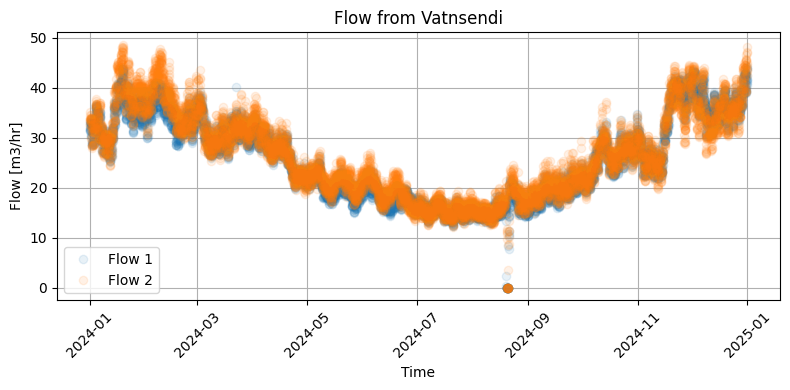

In [427]:
# Convert 'start_time' to datetime format for both DataFrames
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
# df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) & (df_flow_1['start_time'].dt.month == 3)]
# df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024) & (df_flow2['start_time'].dt.month == 3)]

df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) ]
df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_flow_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.1, label='Flow 1')  # Alpha controls opacity

# Plot pressure_2 from df_flow2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.1, label='Flow 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m3/hr]')
plt.title('Flow from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


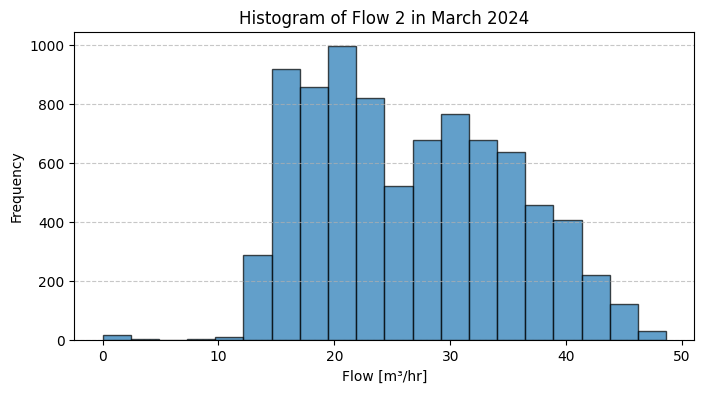

In [428]:
import matplotlib.pyplot as plt

# Create a histogram for Flow 2 values
plt.figure(figsize=(8, 4))
plt.hist(df_filtered_2['value'], bins=20, edgecolor='black', alpha=0.7)

# Customize plot
plt.xlabel('Flow [m³/hr]')
plt.ylabel('Frequency')
plt.title('Histogram of Flow 2 in March 2024')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [429]:
# Convert 'start_time' to datetime format
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
# specific_day = "2024-08-03"

df_specific_day = df_flow_1[df_flow_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)

               start_time  value
23822 2024-11-09 06:00:00  23.57
23823 2024-11-09 04:00:00  23.61
23825 2024-11-09 05:00:00  23.50
23826 2024-11-09 03:00:00  23.68
23827 2024-11-09 02:00:00  23.68
23828 2024-11-09 01:00:00  23.78
23898 2024-11-09 16:00:00  25.68
23899 2024-11-09 17:00:00  25.15
23900 2024-11-09 19:00:00  24.74
23901 2024-11-09 18:00:00  25.40
23902 2024-11-09 10:00:00  24.99
23903 2024-11-09 09:00:00  25.11
23904 2024-11-09 07:00:00  24.10
23905 2024-11-09 08:00:00  23.91
23926 2024-11-09 14:00:00  24.96
23927 2024-11-09 13:00:00  25.47
23928 2024-11-09 15:00:00  24.94
23929 2024-11-09 11:00:00  25.04
23930 2024-11-09 12:00:00  25.11
24016 2024-11-09 23:00:00  22.88
24017 2024-11-09 22:00:00  23.39
24025 2024-11-09 20:00:00  24.43
24027 2024-11-09 21:00:00  23.98


In [430]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-09 01:00:00,23.78,0.974764
2024-11-09 02:00:00,23.68,0.970665
2024-11-09 03:00:00,23.68,0.970665
2024-11-09 04:00:00,23.61,0.967795
2024-11-09 05:00:00,23.50,0.963286
2024-11-09 06:00:00,23.57,0.966156
2024-11-09 07:00:00,24.10,0.987881
2024-11-09 08:00:00,23.91,0.980093
2024-11-09 09:00:00,25.11,1.029282


In [431]:
# df_specific_day["demand_pattern"].to_csv("demand_pattern_2024-11-03",index= False)

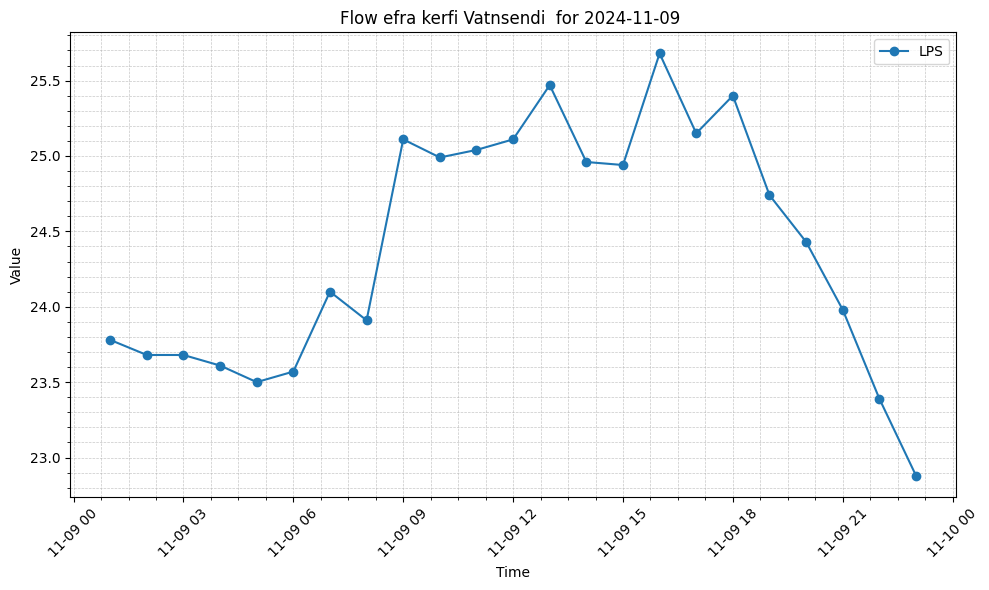

In [432]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='LPS', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Flow efra kerfi Vatnsendi  for {specific_day} ')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [433]:
specific_day

'2024-11-09'

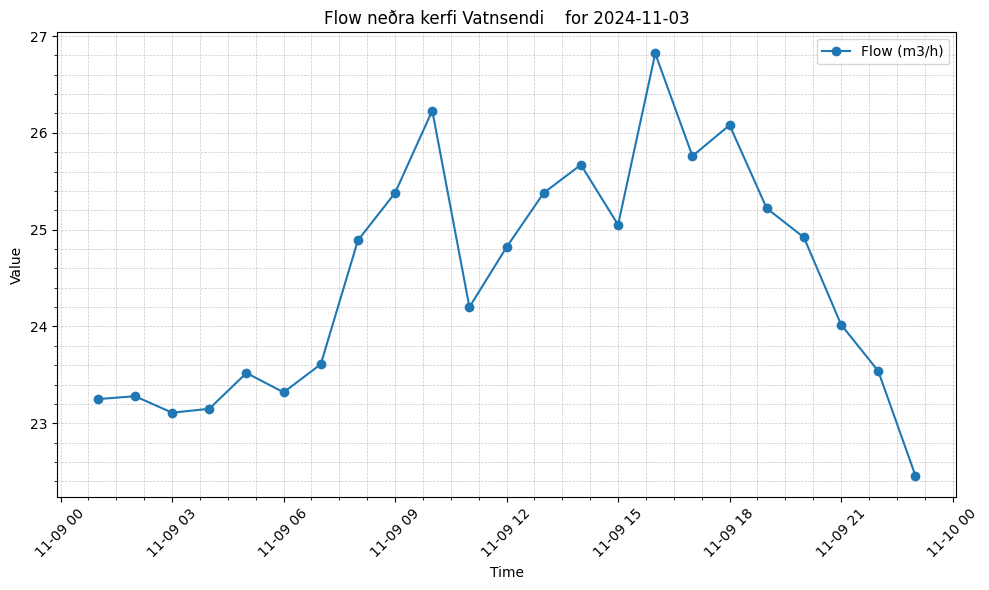

In [434]:
# Convert 'start_time' to datetime format
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
# specific_day = "2024-11-03"

df_specific_day = df_flow2[df_flow2['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern

# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow neðra kerfi Vatnsendi    for 2024-11-03')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [435]:
df_specific_day

,value,demand_pattern
start_time,,
2024-11-09 01:00:00,23.25,0.948677
2024-11-09 02:00:00,23.28,0.949901
2024-11-09 03:00:00,23.11,0.942964
2024-11-09 04:00:00,23.15,0.944596
2024-11-09 05:00:00,23.52,0.959693
2024-11-09 06:00:00,23.32,0.951533
2024-11-09 07:00:00,23.61,0.963366
2024-11-09 08:00:00,24.89,1.015594
2024-11-09 09:00:00,25.38,1.035588


In [436]:
specific_day

'2024-11-09'